# Tool to extract usefull information from mlperf trace

In [1]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [19]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [20]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [21]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-MS-1-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-MS-1-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,1.203600e+04,4012.00000,8024.000000,8.024000e+03,8024.000000
mean,3.063122e+07,279.12419,112410.181954,2.032965e+09,2.032852
std,1.798950e+07,1689.00373,9469.754381,8.986121e+08,0.898612
min,2.215745e+05,3.62100,61210.000000,4.206917e+08,0.420574
25%,1.589035e+07,7.32000,107952.000000,1.194817e+09,1.194707
50%,3.094162e+07,95.17500,113389.000000,1.867581e+09,1.867468
75%,4.558657e+07,256.98125,117035.000000,2.675263e+09,2.675140
max,6.298333e+07,99933.47400,154830.000000,5.315248e+09,5.315132


In [22]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [23]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
100,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
101,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
102,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
103,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
0,2.217011e+05,IssueQuery,170.746,NaN,NaN,NaN
...,...,...,...,...,...,...
12015,6.295147e+07,QuerySamplesComplete,6.230,NaN,NaN,NaN
12020,6.295341e+07,QuerySamplesComplete,5.951,NaN,NaN,NaN
12025,6.295511e+07,QuerySamplesComplete,5.772,NaN,NaN,NaN
12030,6.297972e+07,QuerySamplesComplete,5.489,NaN,NaN,NaN


In [24]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
100,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
101,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
102,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
103,2.215745e+05,Sample,NaN,125875.0,1.031145e+09,1.031019
109,2.265745e+05,Sample,NaN,95774.0,1.139838e+09,1.139742
...,...,...,...,...,...,...
11983,6.016157e+07,Sample,NaN,114292.0,2.771359e+09,2.771245
11936,6.080157e+07,Sample,NaN,119204.0,2.095329e+09,2.095210
11937,6.080157e+07,Sample,NaN,119204.0,2.095329e+09,2.095210
11938,6.080157e+07,Sample,NaN,119204.0,2.095329e+09,2.095210


In [28]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,2.217011e+05,IssueQuery,170.746,NaN,NaN,NaN
1,2.266709e+05,IssueQuery,127.228,NaN,NaN,NaN
2,2.316985e+05,IssueQuery,229.532,NaN,NaN,NaN
3,2.366869e+05,IssueQuery,192.361,NaN,NaN,NaN
4,2.416989e+05,IssueQuery,199.841,NaN,NaN,NaN
...,...,...,...,...,...,...
11541,6.014669e+07,IssueQuery,219.671,NaN,NaN,NaN
11542,6.015168e+07,IssueQuery,239.044,NaN,NaN,NaN
11543,6.015670e+07,IssueQuery,195.275,NaN,NaN,NaN
11544,6.016169e+07,IssueQuery,291.087,NaN,NaN,NaN


In [29]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [31]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
104,1.252721e+06,QuerySamplesComplete,47.256,NaN,NaN,NaN
110,1.366414e+06,QuerySamplesComplete,22.600,NaN,NaN,NaN
116,1.369969e+06,QuerySamplesComplete,11.265,NaN,NaN,NaN
121,1.392612e+06,QuerySamplesComplete,17.177,NaN,NaN,NaN
126,1.398263e+06,QuerySamplesComplete,16.627,NaN,NaN,NaN
...,...,...,...,...,...,...
12015,6.295147e+07,QuerySamplesComplete,6.230,NaN,NaN,NaN
12020,6.295341e+07,QuerySamplesComplete,5.951,NaN,NaN,NaN
12025,6.295511e+07,QuerySamplesComplete,5.772,NaN,NaN,NaN
12030,6.297972e+07,QuerySamplesComplete,5.489,NaN,NaN,NaN


# Multistream scenario

In [78]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"
all_files = glob.glob(path + "*MS.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,multistream,5,1,130.434892,5.564377,6.647800,6.893196,6.991670,7.080688,7.341526,7.728528
1,resnet,none,32,1,multistream,5,2,129.452999,5.584716,6.746861,6.965320,7.078333,7.186332,7.438376,7.767223
2,resnet,none,32,1,multistream,5,3,129.989899,5.570135,6.691853,6.901813,7.012968,7.118774,7.389532,7.585420
3,resnet,none,32,1,multistream,5,4,130.204682,5.558828,6.675344,6.910723,7.017172,7.109644,7.365614,7.695119
4,resnet,none,32,1,multistream,5,5,129.664127,5.569230,6.711717,6.943602,7.039987,7.147759,7.408979,7.756734


In [79]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,multistream,5,1,130.434892,5.564377,6.647800,6.893196,6.991670,7.080688,7.341526,7.728528
1,resnet,none,32,1,multistream,5,2,129.452999,5.584716,6.746861,6.965320,7.078333,7.186332,7.438376,7.767223
2,resnet,none,32,1,multistream,5,3,129.989899,5.570135,6.691853,6.901813,7.012968,7.118774,7.389532,7.585420
3,resnet,none,32,1,multistream,5,4,130.204682,5.558828,6.675344,6.910723,7.017172,7.109644,7.365614,7.695119
4,resnet,none,32,1,multistream,5,5,129.664127,5.569230,6.711717,6.943602,7.039987,7.147759,7.408979,7.756734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,baseline,32,1,multistream,5,6,119.940624,6.441728,7.388804,7.508417,7.565126,7.610827,7.696592,7.773303
126,resnet,baseline,32,1,multistream,5,7,120.724758,6.354257,7.337010,7.478876,7.543083,7.584711,7.671599,7.744842
127,resnet,baseline,32,1,multistream,5,8,121.050772,6.330624,7.310532,7.446403,7.507664,7.579025,7.667619,7.735700
128,resnet,baseline,32,1,multistream,5,9,120.969829,6.347183,7.339301,7.458145,7.511517,7.557884,7.630101,7.719369


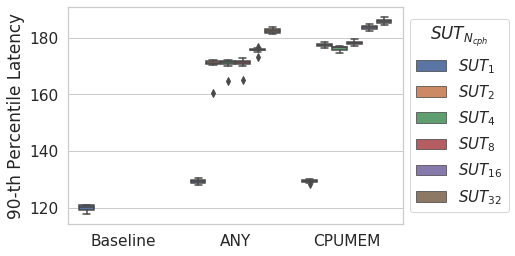

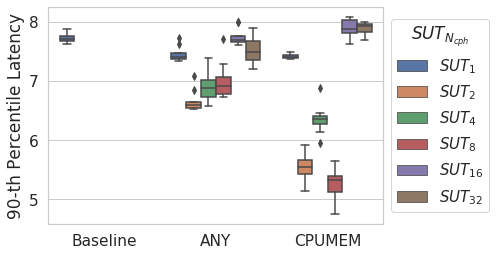

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
color=["blue","green","yellow","red","orange","grey"]

for x in ['qps','p99']:
#     for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #                          |\
    #                          (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
    #                 print(dfg_bench)
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.boxplot(x = dfall['k8senv'],
                        y = dfall[x],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
#             plt.legend(legend,prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            plt.xlabel("")
            plt.ylabel("90-th Percentile Latency")
            plt.savefig('ms-metric.pdf',bbox_inches='tight')  
            plt.show()


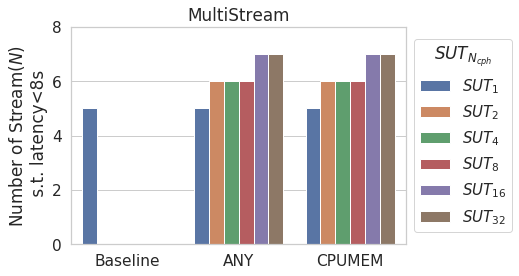

In [92]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
color=["blue","green","yellow","red","orange","grey"]

for x in ['qps']:
#     for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #                          |\
    #                          (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
    #                 print(dfg_bench)
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.barplot(x = dfall['k8senv'],
                        y = dfall['cbatch'],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
#             plt.legend(legend,prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            ax.set(ylim=(0, 8))  
            plt.xlabel("")
            plt.ylabel("Number of Stream($N$) \n s.t. latency<8s")
            plt.title("MultiStream")
            plt.savefig('ms-metric.pdf',bbox_inches='tight')  
            plt.show()


In [82]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
# x=0
# for add in SCEN:
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["IssueQuery"])]
#     print(df1)
# #     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# #     ax.set_title('IssueQuery duration (usec)');
# #     x=x+1
# #     plt.show()

# # df1['delta'].describe()

In [280]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

In [33]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# for batch in ['1']:
#     SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
#     x=0
#     for add in SCEN:
#         df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#         df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
#     #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     #     ax.set_title('Inference time (usec)');
#     #     x = x+1
#     #     plt.show()

#         # Draw the density plot
#         sns.distplot(df1['dur'], hist = False, kde = True,
#                      kde_kws = {'linewidth': 3},
#                      label = SCEN[x])
#         x=x+1

#     # Plot formatting
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.title('Inference time (usec) -- batch'+str(batch))
#     plt.xlabel('time (usec)')
#     plt.ylabel('Density')
#     plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-MS-12-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.573038772
8.0678652005
7.954560232750333
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-MS-12-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10.187419614
5.844743699
5.737312044237417
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-2-32-MS-14-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
11.805550772
6.5537935439999995
6.553876221508954
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-MS-15-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
11.511155251
7.178862244499999
7.127572605616158
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-4-32-MS-16-1/mlpe

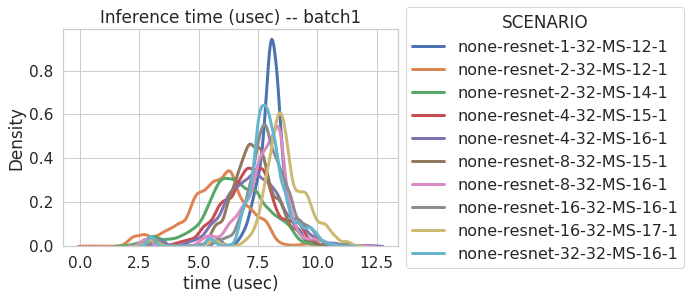

In [60]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['1']:
    SCEN=[
    'none-resnet-1-32-MS-12-1',
      'none-resnet-2-32-MS-12-1','none-resnet-2-32-MS-14-1',
            'none-resnet-4-32-MS-15-1','none-resnet-4-32-MS-16-1',
           'none-resnet-8-32-MS-15-1','none-resnet-8-32-MS-16-1',
      'none-resnet-16-32-MS-16-1','none-resnet-16-32-MS-17-1',
'none-resnet-32-32-MS-16-1'
]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(max(df1['issue_to_done']))
        print(np.median(df1['issue_to_done']))
        print(np.mean(df1['issue_to_done']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time (usec) -- batch'+str(batch))
    plt.xlabel('time (usec)')
    plt.ylabel('Density')
    plt.show()

In [34]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# for batch in ['32']:
#     SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
#     x=0
#     for add in SCEN:
#         df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#         df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#         df1.reset_index(drop=True,inplace=True)
#         ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
#         ax.set_title('Individual inference time (usec)');
#         ax.set(ylim=(0, 150))
#         x=x+1
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.show()
#     plt.xlabel('#QuerySamples')

In [536]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

24576

In [62]:
BINS=12
color=["blue","green","yellow","red","orange","grey","blue","green","yellow","red","orange","grey",]
for batch in ['1']:
    SCEN=[
    'none-resnet-1-32-MS-12-1',
      'none-resnet-2-32-MS-12-1','none-resnet-2-32-MS-14-1',
            'none-resnet-4-32-MS-15-1','none-resnet-4-32-MS-16-1',
           'none-resnet-8-32-MS-15-1','none-resnet-8-32-MS-16-1',
      'none-resnet-16-32-MS-16-1','none-resnet-16-32-MS-17-1',
'none-resnet-32-32-MS-16-1'
]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
#         df1.reset_index(drop=True,inplace=True)
  
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
#         df1['issue_start_ns'] =  df1['issue_start_ns'] / 1e9
#         ax = df1['issue_start_ns'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
        ax.set_title('Individual inference time (usec)');
        ax.set(xlim=(0, 5000))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-MS-12-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


JSONDecodeError: Expecting ',' delimiter: line 11 column 96 (char 936)

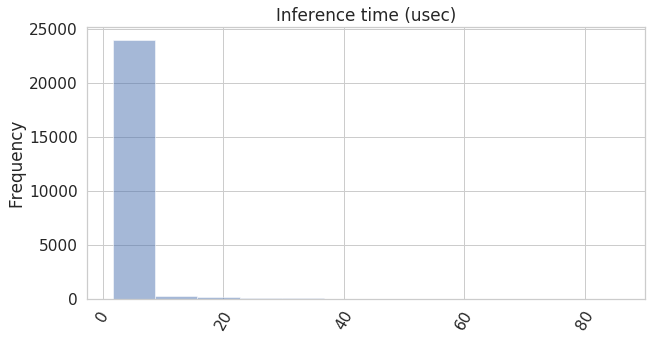

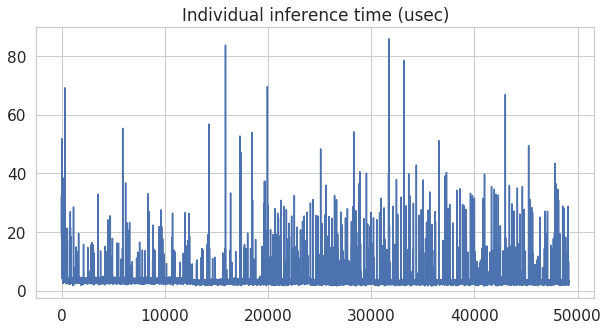

In [312]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

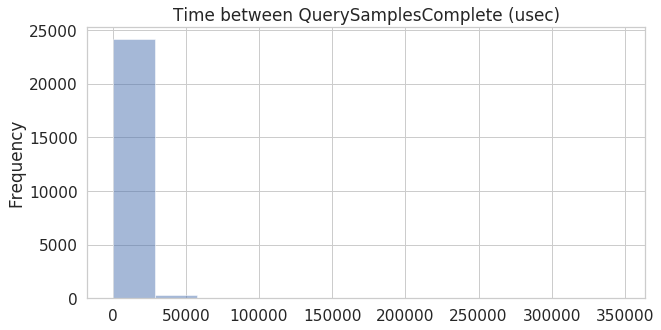

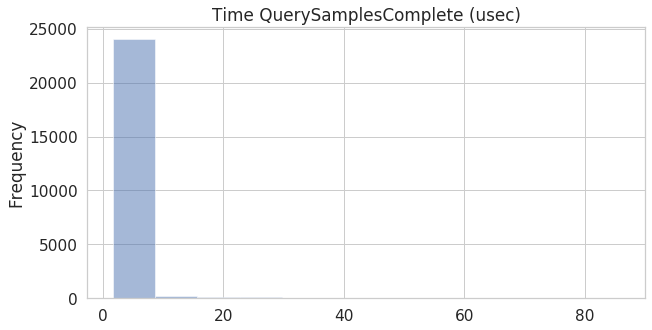

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');